# Banking Marketing Campaign (logistic regression project)

## Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

## Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Load data
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df_raw = pd.read_csv(url, sep=';')
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
34377,32,entrepreneur,divorced,high.school,no,yes,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
19165,35,admin.,married,university.degree,no,yes,no,cellular,aug,tue,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
27053,36,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
14091,33,entrepreneur,married,university.degree,no,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
13769,42,admin.,single,high.school,no,yes,no,cellular,jul,thu,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
5764,35,admin.,married,high.school,no,no,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23786,53,entrepreneur,married,basic.4y,unknown,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
26106,36,technician,married,professional.course,no,yes,no,telephone,nov,wed,...,7,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
8130,59,retired,divorced,university.degree,no,no,no,telephone,jun,mon,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,yes


In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data dictionary
- **age**: Age of customer (numeric)  
- **job**: Type of job (categorical)  
- **marital**: Marital status (categorical)  
- **education**: Level of education (categorical)  
- **default**: Do you currently have credit (categorical)  
- **housing**: Do you have a housing loan (categorical)  
- **loan**: Do you have a personal loan? (categorical)  
- **contact**: Type of contact communication (categorical)  
- **month**: Last month in which you have been contacted (categorical)  
- **day_of_week**: Last day on which you have been contacted (categorical)  
- **duration**: Duration of previous contact in seconds (numeric)  
- **campaign**: Number of contacts made during this campaign to the customer (numeric)  
- **pdays**: Number of days that elapsed since the last campaign until the customer was contacted (numeric)  
- **previous**: Number of contacts made during the previous campaign to the customer (numeric)  
- **poutcome**: Result of the previous marketing campaign (categorical)  
- **emp.var.rate**: Employment variation rate. Quarterly indicator (numeric)  
- **cons.price.idx**: Consumer price index. Monthly indicator (numeric)  
- **cons.conf.idx**: Consumer confidence index. Monthly indicator (numeric)  
- **euribor3m**: EURIBOR 3-month rate. Daily indicator (numeric)  
- **nr.employed**: Number of employees. Quarterly indicator (numeric)  
- **y (TARGET)**: Whether the customer takes out a long-term deposit or not (categorical)  


### First analysis:

The bank wants to know which customer is more likely to take out long-term deposits, THUS focus on those customers and initiate contact with them. 

The data includes:
- DEMOGRAPHICS: 
    - age, job, marital, education
- FINANCIAL DATA:
    - default, housing, loan
- MARKETING INFO:
    - contact, month, day_of_week, campaign, pdays, previous, poutcome
- MACROECONOMIC INDEXES:
    - emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

All these variables seem useful for the desired prediction.

In [24]:
df_baking = df_raw.copy()

In [25]:
# Preprocessing
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome',
            'y']

int_cols = ['duration', 'campaign', 'pdays', 'previous']

float_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
              'euribor3m', 'nr.employed']

df_baking[cat_cols] = df_baking[cat_cols].astype('category')
df_baking[int_cols] = df_baking[int_cols].astype('int')
df_baking[float_cols] = df_baking[float_cols].astype('float')

df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [26]:
# Setting appropiate order for time categories
month = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 
         'sep', 'oct', 'nov', 'dec']

day = ['mon', 'tue', 'wed', 'thu', 'fri']

df_baking['month'] = df_baking['month'].cat.reorder_categories(new_categories=month)
df_baking['day_of_week'] = df_baking['day_of_week'].cat.reorder_categories(new_categories=day)

In [27]:
df = df_baking.copy()

In [28]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [29]:
df.describe(include='category').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


### Numeric Variables Analysis

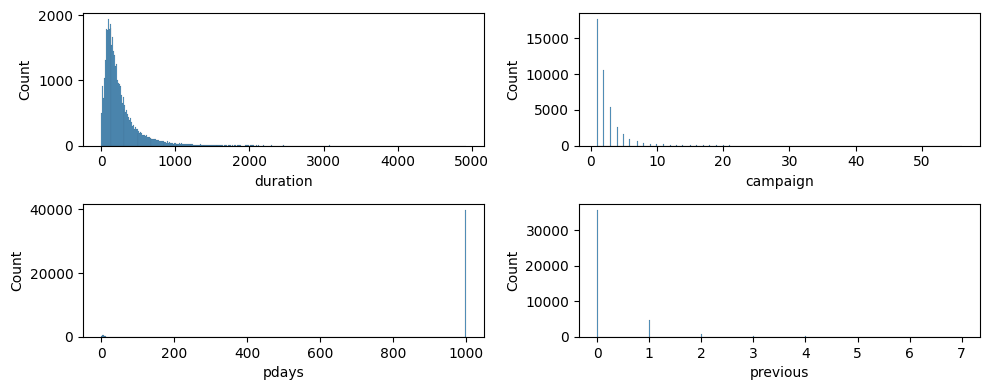

In [30]:
int_cols = ['duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(2, 2, figsize=(10, 4))

axes = ax.flatten()

for i, col in enumerate(int_cols):
    sns.histplot(ax=axes[i], data=df, x=col)

plt.tight_layout()
plt.show()

The following can be observed from the numerical analysis:
- Age distribution has a slight positive skewness. The data set contains people from 17 up to 98 years old. The data set mainly contains people from 30 to 50 years old, which makes sense since people start investing in their retirement at that age. People over 60 are underrepresented, which also makes sense, but can also be biased by the mortality rate of the region. 
- The duration of previous contact distribution has a positive skewness. Contact range from 0 to 4918 seconds, with a mean of 258 seconds or around 5 minutes on average. 
- Customers were at least approached once during the campaing. Most people were approached from 1 to 3 times, with some outliers up to 56 times approached. 

### Categorical variables analysis

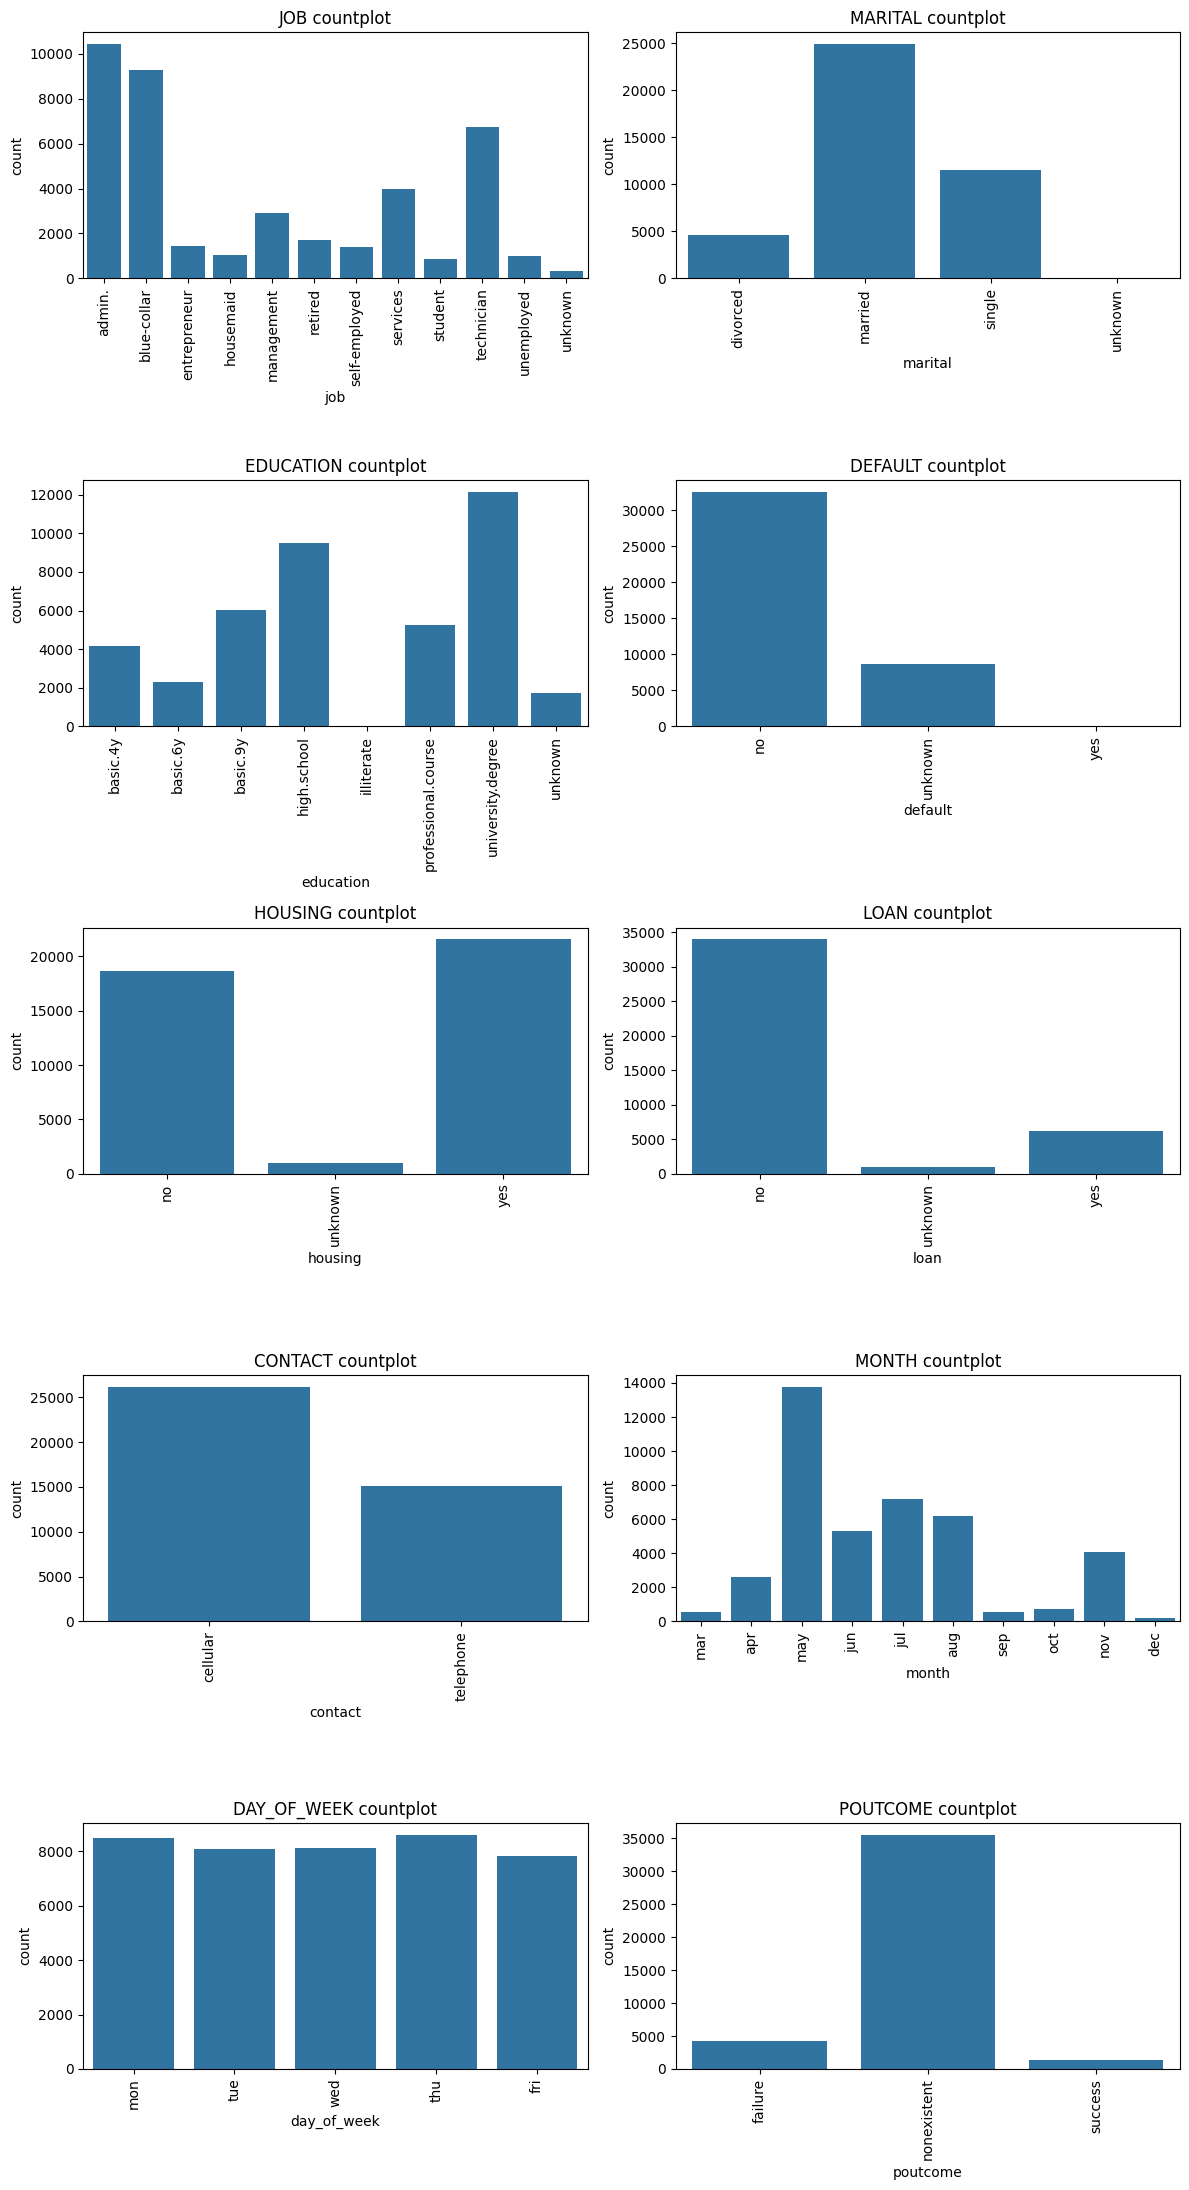

In [31]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

fig, ax = plt.subplots(5, 2, figsize=(12, 22))

axes = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col.upper()} countplot')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

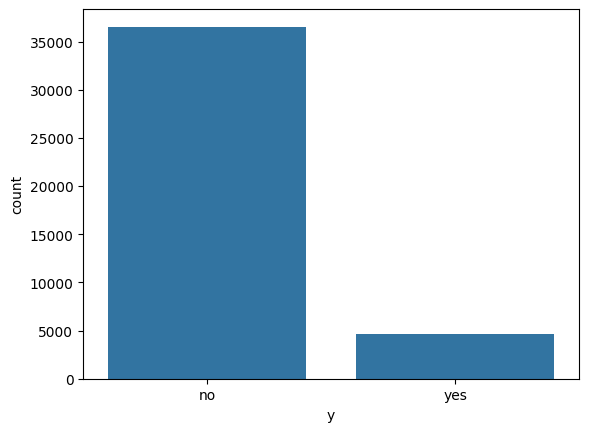

In [32]:
sns.countplot(data=df, x='y')
plt.show()

The following can be observed in the categorical analysis: 
- Most customers are in management, blue collar or technician jobs, while other categories are relatively common but not as much as the ones mentioned before. Unknown and unemployed are rare. 
- The majority are married. Single is more common than divorced.
- High school and university degree dominate. Illiterate and unknown are almost negligible.
- The majority of customers report no credit in default.
- Customers are almost split equally between those who have a housing loan and those who don't. Very few report none. 
- Most customers don't have a personal loan.
- Most customers have been contacted through cellular. Telephone is (ballparking) 50% less common than cellular.
- May is the month with more contacts. June, July, August are also months with considerable number of contacts made.
- Contacts are evenly distributed across weekdays, with almost no variation.
- The vast majority of the results of the previous marketin campaign are nonexistent. There is slightly more failure than success. 
- Most people in the data set are NOT likely to take out long-term deposits.

## Machine Learning (logistic regression)

In [33]:
# Split data
X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2025)

In [34]:
# Pipeline
num_cols = X.select_dtypes('number').columns
cat_cols = X.select_dtypes('category').columns

processor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), num_cols),
        ('categorical', OneHotEncoder(), cat_cols)
    ])

model = Pipeline(
    steps=[
        ('process', processor),
        ('log_reg', LogisticRegression())
    ])

In [35]:
# Model training
model.fit(X_train, y_train)

,steps,"[('process', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_hat = model.predict(X_test)

### Validation of the model

In [37]:
display('Accuracy score:', accuracy_score(y_test, y_hat))

'Accuracy score:'

0.9162418062636563

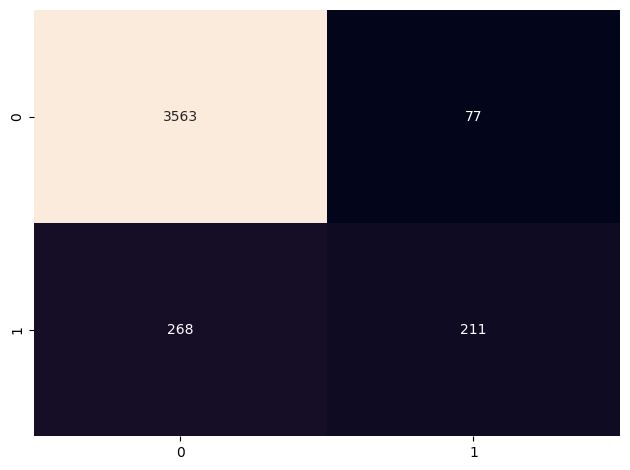

In [38]:
bank_cm = confusion_matrix(y_test, y_hat)
bank_df = pd.DataFrame(bank_cm)

sns.heatmap(bank_df, annot=True, fmt='d', cbar=False)
plt.tight_layout()
plt.show()

### Interpretation of results
- **True Positive**: The model predicts *correctly* that 3563 people wont take out a long term deposit.
- **True Negative**: The model predicts *correctly* that 211 people will take out a long term deposit.
- **False Positive**: The model predicts *incorrectly* that 268 will take out a long term deposit, but they actually won't. 
- **False Negative**: The model predicts *incorrectly* that 77 people won't take out a long term deposit, but they actually will. 

The model correctly classifies the outcome 91% of the time. 